In [2]:
#import library penting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

%matplotlib inline

In [3]:
#load dataset
data = pd.read_csv('Stroke Dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##step EDA

In [4]:
drop = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [5]:
data.drop(drop,inplace=True, axis=1)

In [6]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [7]:
data.fillna(-1, inplace=True)

In [8]:
#cek data kosong
data.isnull().values.any()

False

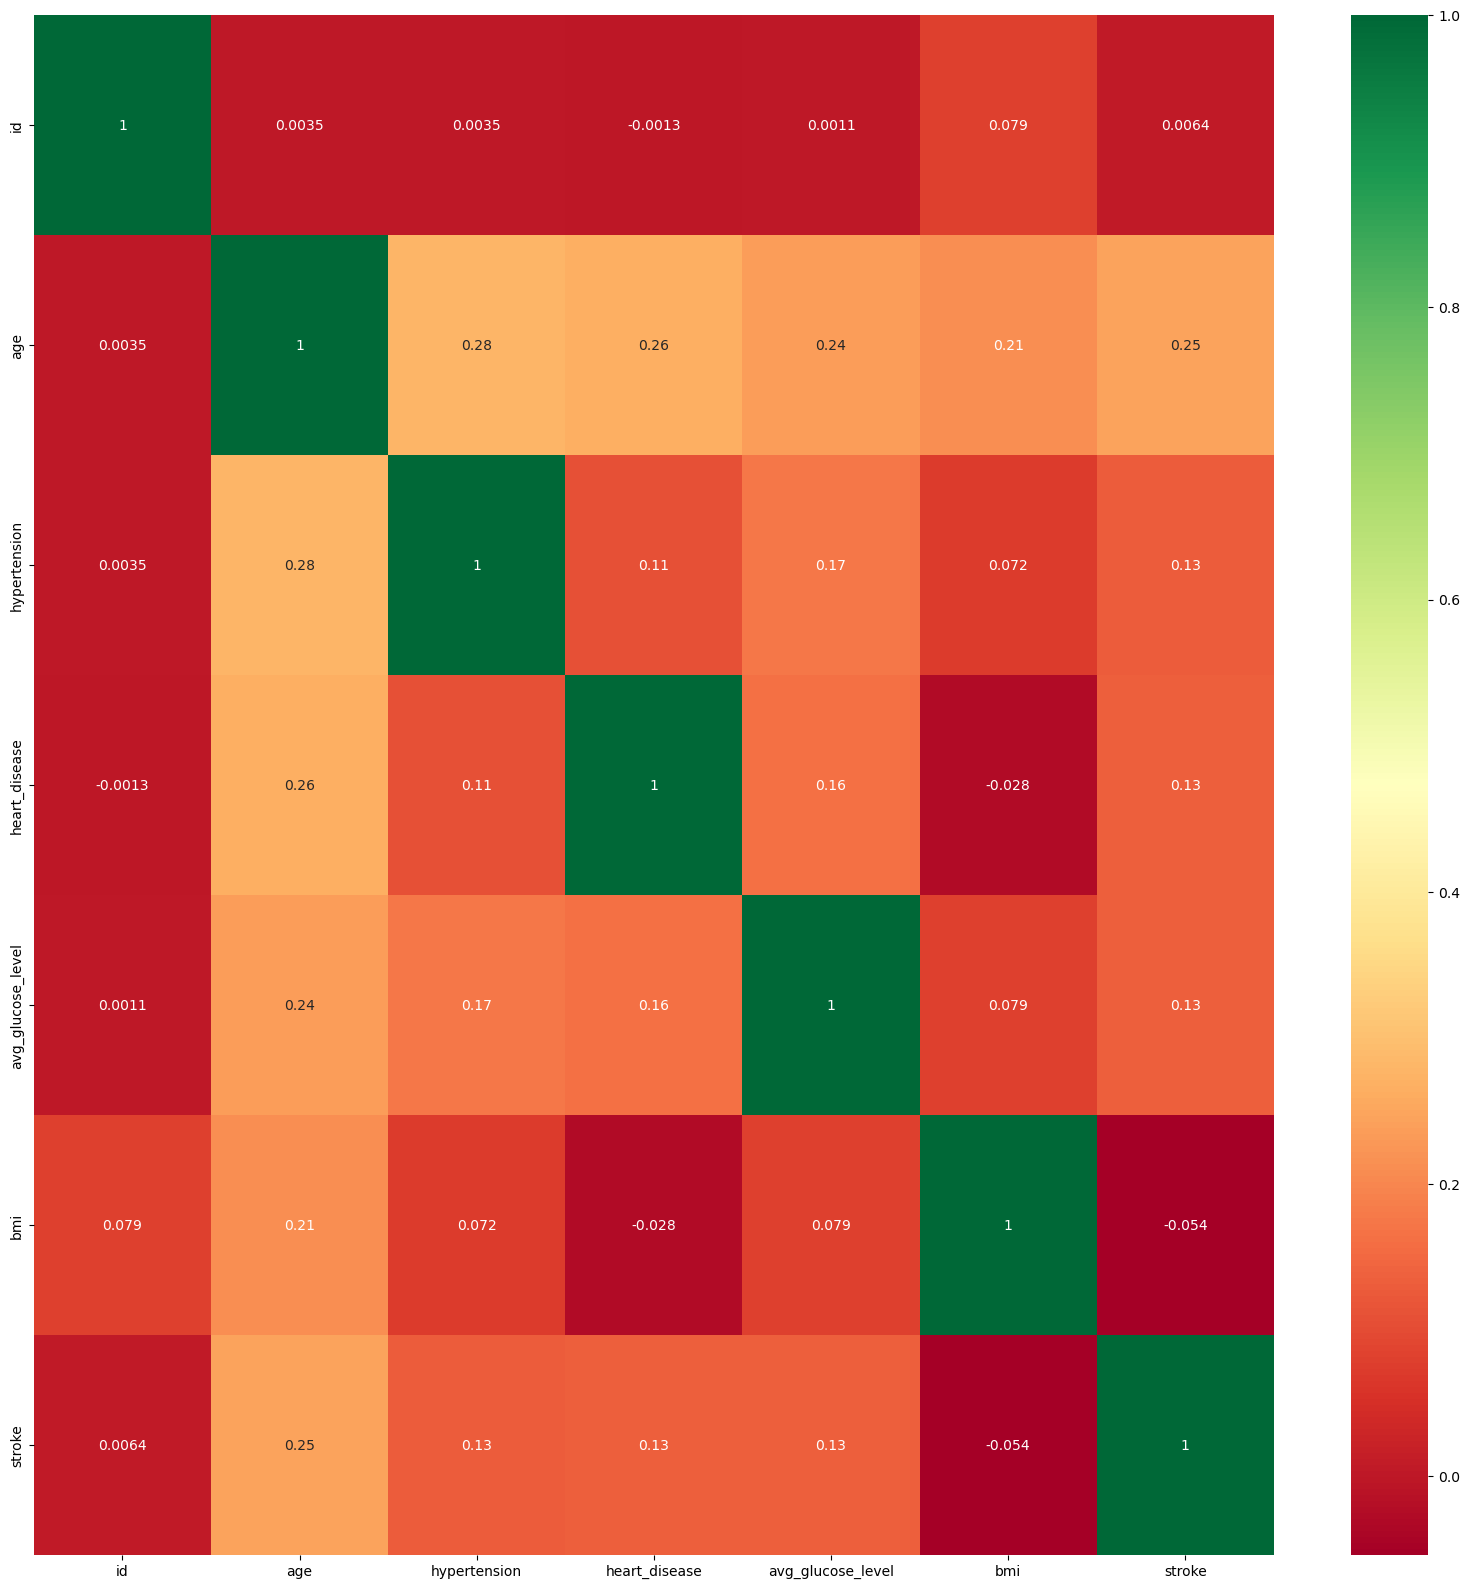

In [9]:
#Korelasi menggunakan heatmap
import seaborn as sns 

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")


In [10]:
#Show corellation in tables
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.079295,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.212564,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.071786,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,-0.028375,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.079276,0.131945
bmi,0.079295,0.212564,0.071786,-0.028375,0.079276,1.000000,-0.054015
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,-0.054015,1.000000


In [11]:
#statistika dasar
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,27.717397,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,9.645369,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,-1.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
#checking skewness dari data
stroke_true_count =len(data.loc[data['id']==1])
stroke_false_count = len(data.loc[data['id']==0])

In [13]:
#view
(stroke_true_count,stroke_false_count)

(0, 0)

In [14]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 5110
total number of columns : 7


In [15]:
data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [16]:
print('Banyak baris nilai nol untuk age :{0}'.format(len(data.loc[data['age']==0])))
print('Banyak baris nilai nol untuk hypertension :{0}'.format(len(data.loc[data['hypertension']==0])))
print('Banyak baris nilai nol untuk heart_disease :{0}'.format(len(data.loc[data['heart_disease']==0])))
print('Banyak baris nilai nol untuk avg_glucose_level :{0}'.format(len(data.loc[data['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk bmi :{0}'.format(len(data.loc[data['bmi']==0])))


Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk hypertension :4612
Banyak baris nilai nol untuk heart_disease :4834
Banyak baris nilai nol untuk avg_glucose_level :0
Banyak baris nilai nol untuk bmi :0


In [17]:
data2 = data.copy()

In [18]:
#rata-rata
avg_hypertension = data2['hypertension'].mean()
avg_heart_disease = data2['heart_disease'].mean()
avg_avg_glucose_level = data2['avg_glucose_level'].mean()
avg_bmi = data2['bmi'].mean()


In [19]:
#now replace avg to columns 
data2['hypertension'].replace({0:avg_hypertension},inplace=True)
data2['heart_disease'].replace({0:avg_heart_disease},inplace=True)
data2['avg_glucose_level'].replace({0:avg_avg_glucose_level},inplace=True)
data2['bmi'].replace({0:avg_bmi},inplace=True)


In [20]:
print('Banyak baris nilai nol untuk age :{0}'.format(len(data2.loc[data2['age']==0])))
print('Banyak baris nilai nol untuk hypertension :{0}'.format(len(data2.loc[data2['hypertension']==0])))
print('Banyak baris nilai nol untuk heart_disease :{0}'.format(len(data2.loc[data2['heart_disease']==0])))
print('Banyak baris nilai nol untuk avg_glucose_level :{0}'.format(len(data2.loc[data2['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk bmi :{0}'.format(len(data2.loc[data2['bmi']==0])))

Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk hypertension :0
Banyak baris nilai nol untuk heart_disease :0
Banyak baris nilai nol untuk avg_glucose_level :0
Banyak baris nilai nol untuk bmi :0


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

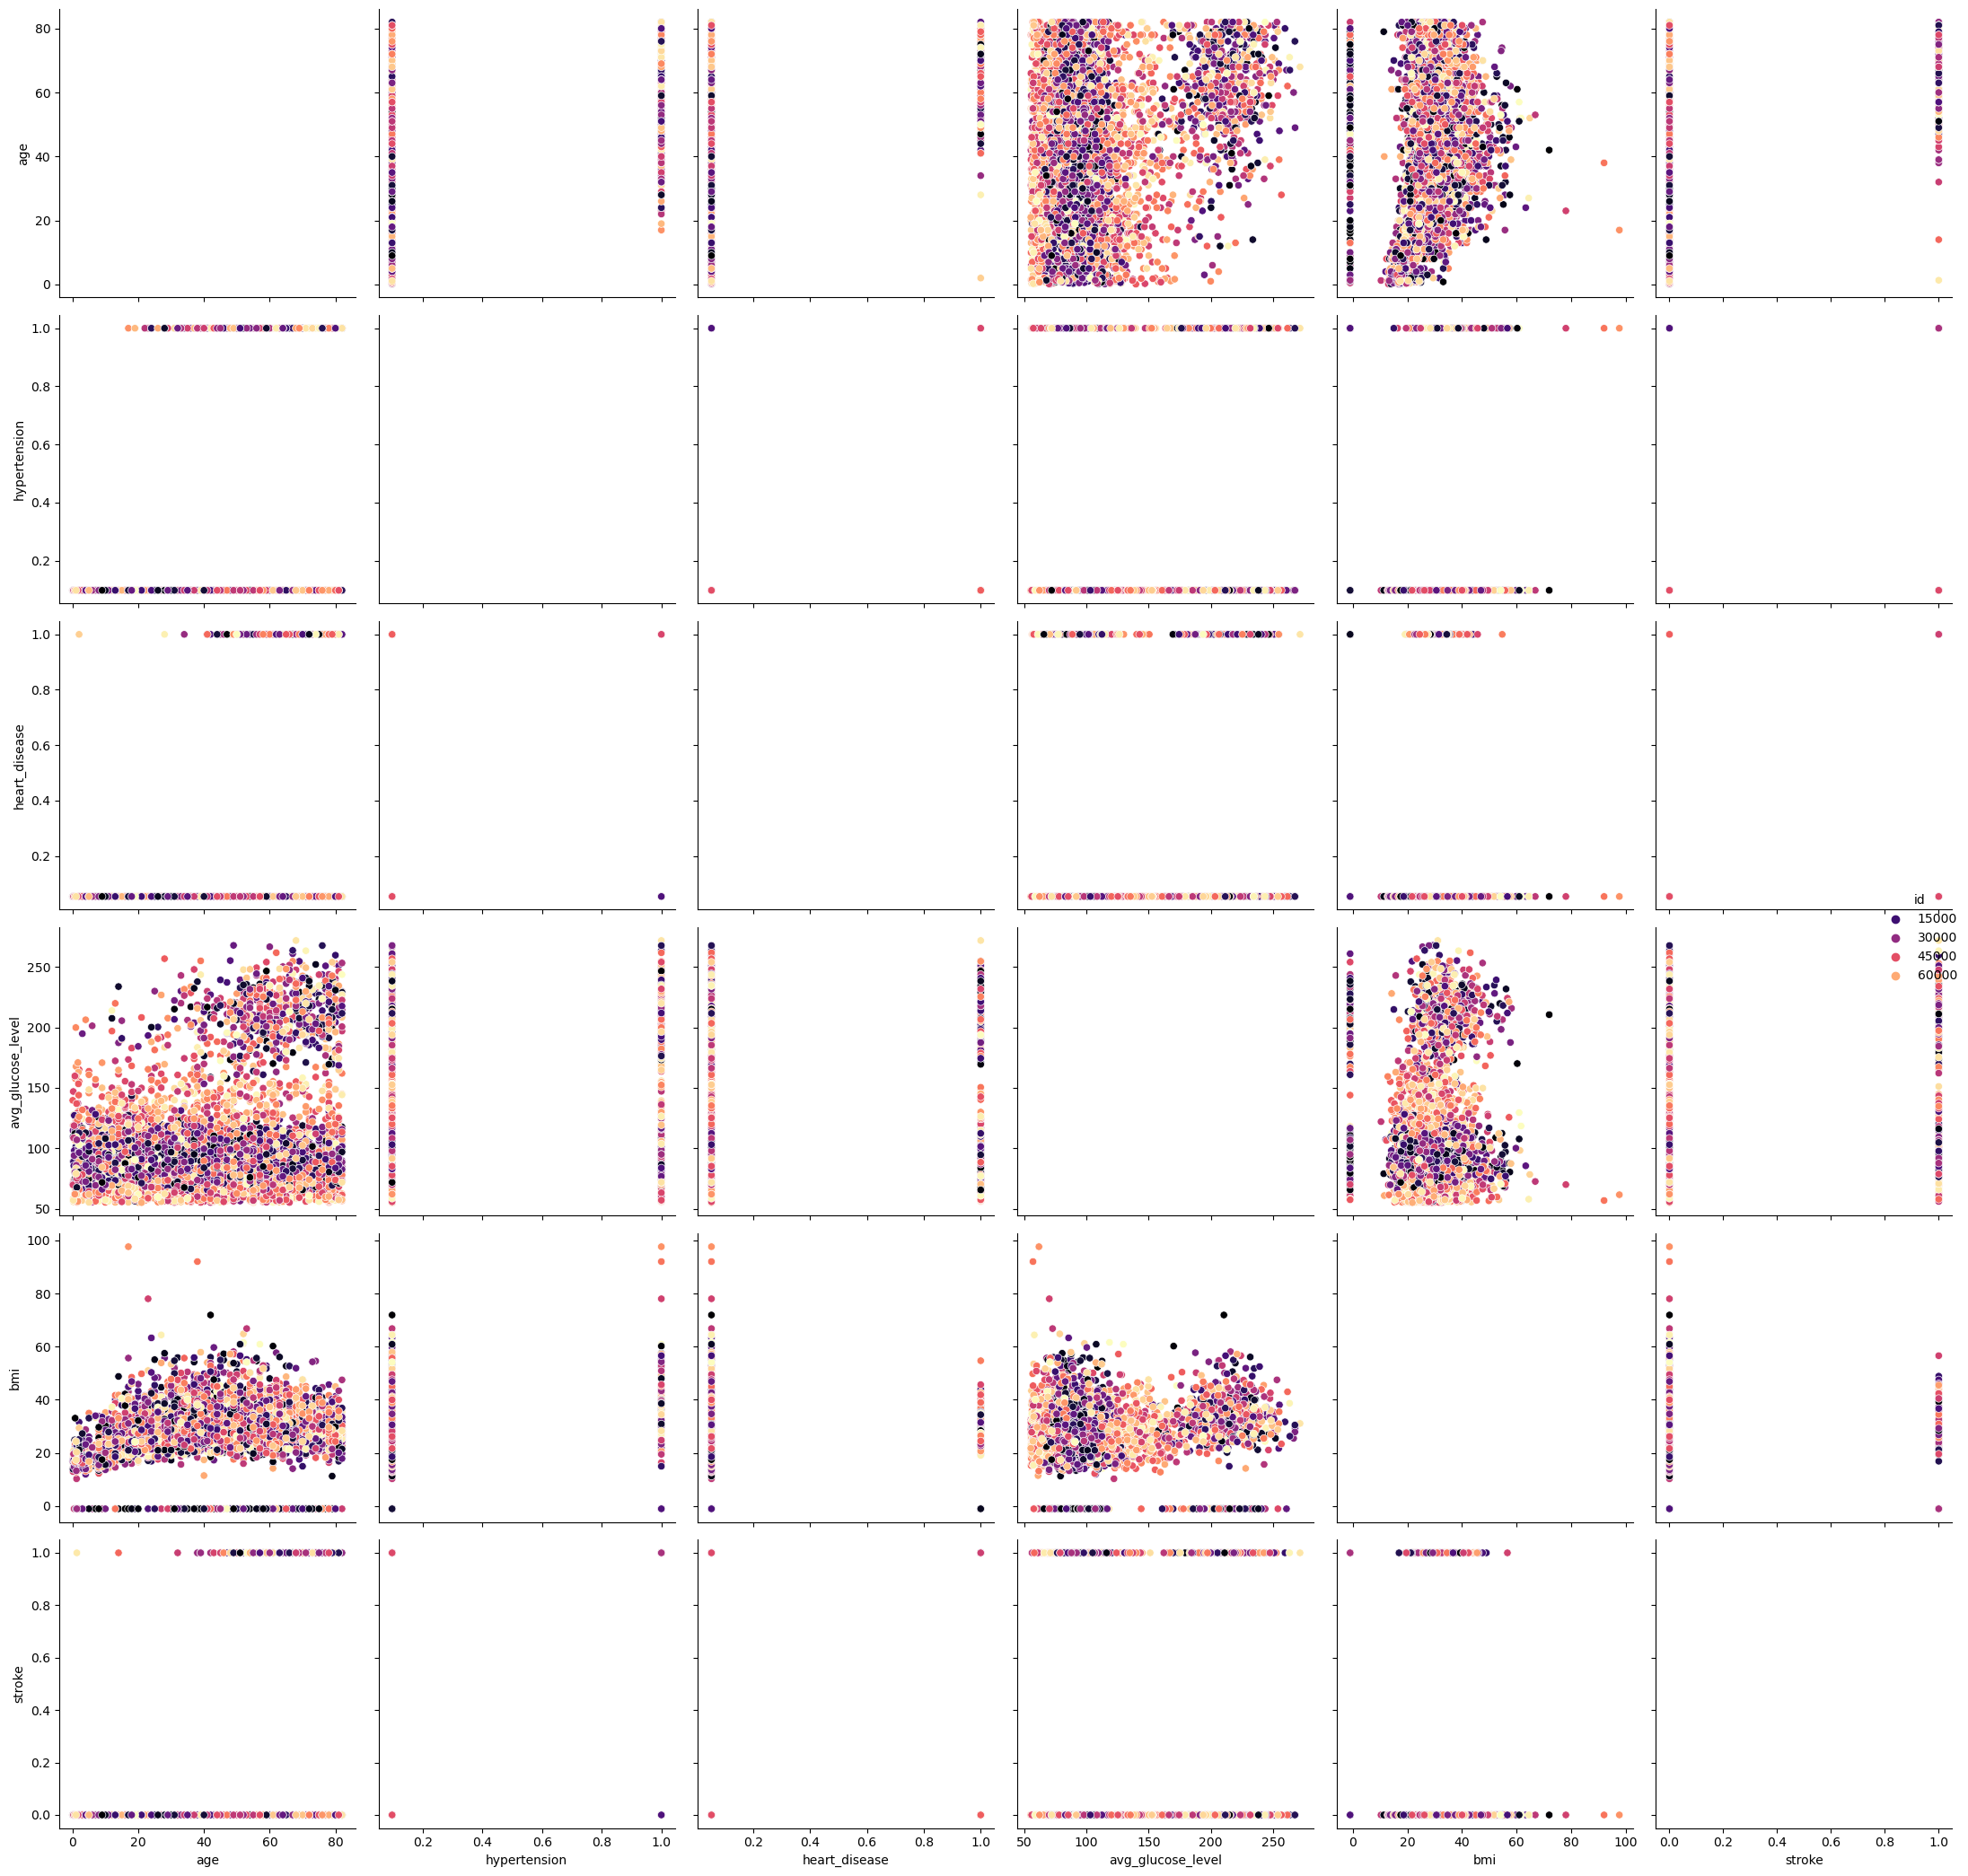

In [21]:
#make pairplot
sns.pairplot(data2,hue='id',palette='magma',height=3.5)
plt.tight_layout()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

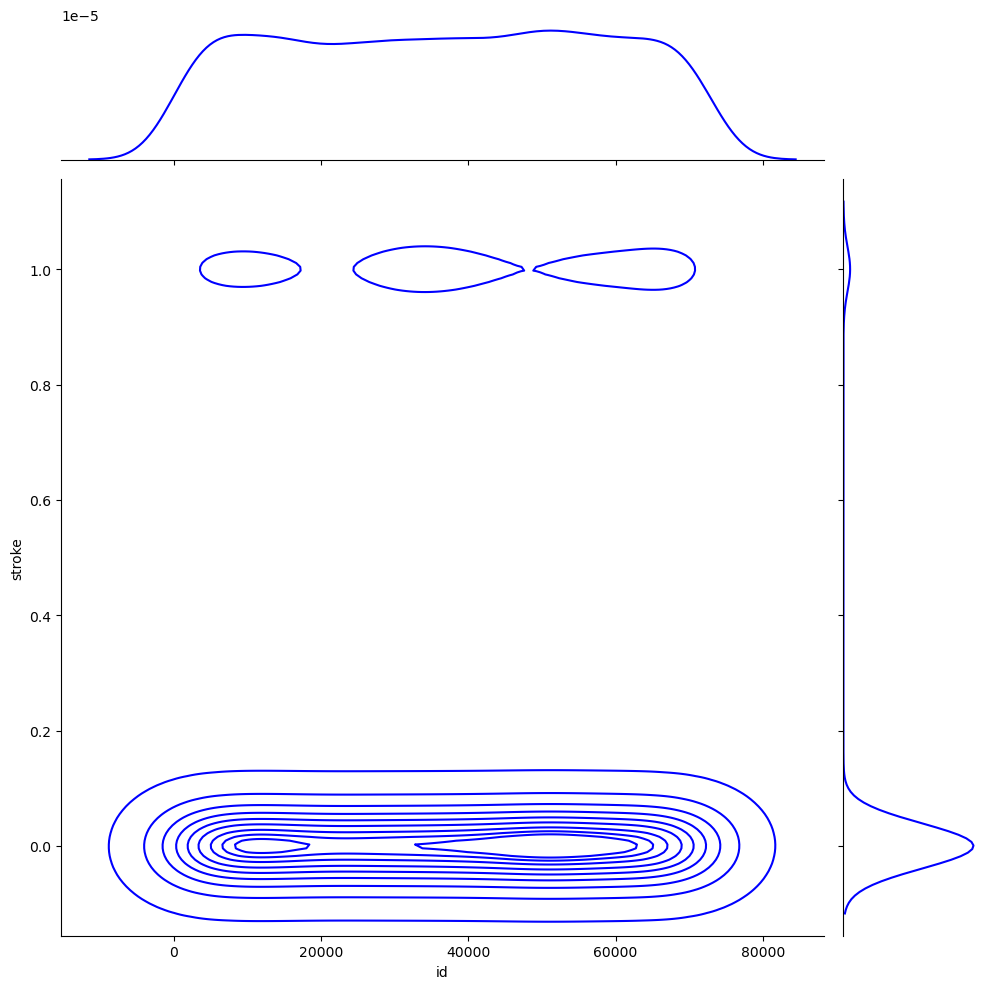

In [22]:
#joinplot
sns.jointplot(x='id',y='stroke',data=data2,height=10,kind='kde',color='blue')
plt.tight_layout()

Apply Model

In [23]:
from sklearn.model_selection import train_test_split

X = data2.drop('id',axis=1)
y = data2['id']

In [24]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.097456,1.000000,228.69,36.6,1
1,61.0,0.097456,0.054012,202.21,-1.0,1
2,80.0,0.097456,1.000000,105.92,32.5,1
3,49.0,0.097456,0.054012,171.23,34.4,1
4,79.0,1.000000,0.054012,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1.000000,0.054012,83.75,-1.0,0
5106,81.0,0.097456,0.054012,125.20,40.0,0
5107,35.0,0.097456,0.054012,82.99,30.6,0
5108,51.0,0.097456,0.054012,166.29,25.6,0


In [25]:
y

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
802,79.00,0.097456,0.054012,112.64,28.5,0
3927,62.00,0.097456,0.054012,88.32,36.3,0
2337,21.00,0.097456,0.054012,59.52,33.7,0
3910,31.00,0.097456,0.054012,65.70,30.4,0
1886,31.00,0.097456,0.054012,59.63,19.9,0
...,...,...,...,...,...,...
4426,43.00,0.097456,0.054012,88.00,30.6,0
466,61.00,1.000000,0.054012,170.05,60.2,0
3092,1.16,0.097456,0.054012,97.28,17.8,0
3772,80.00,0.097456,0.054012,196.08,31.0,0


In [28]:
X_train.shape

(4088, 6)

In [29]:
y_train.shape

(4088,)

In [30]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
4688,31.00,0.097456,0.054012,64.85,23.0,0
4478,40.00,0.097456,0.054012,65.29,28.3,0
3849,8.00,0.097456,0.054012,74.42,22.5,0
4355,79.00,1.000000,0.054012,76.64,19.5,0
3826,75.00,0.097456,0.054012,94.77,27.2,0
...,...,...,...,...,...,...
3605,1.88,0.097456,0.054012,143.97,-1.0,0
4934,1.32,0.097456,0.054012,107.02,-1.0,0
4835,49.00,1.000000,0.054012,119.30,30.4,0
4105,56.00,0.097456,0.054012,128.63,24.9,0


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Buat dataset sintetis
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 sampel, 5 fitur
y = (X[:, 0] + 2 * X[:, 1] - 0.5 * X[:, 3] + np.random.randn(100) > 0).astype(int)

In [32]:
# Bagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Konversi dataset ke format DMatrix (diperlukan oleh XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [34]:
# Tentukan parameter XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

In [35]:
# Latih model XGBoost
num_round = 100
bst = xgb.train(params, dtrain, num_round)


In [36]:
# Buat prediksi pada set pengujian
y_pred = bst.predict(dtest)

In [37]:
# Konversi probabilitas prediksi menjadi prediksi biner
y_pred_binary = np.round(y_pred)


In [38]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.75


##training

In [39]:
from sklearn.svm import SVC

SVC_model = SVC()

In [40]:
SVC_model.fit(X_train,y_train)


SVC()

##Save Model

In [41]:
import pickle

pickle.dump(SVC_model,open('XGBoost.pkl','wb'))